In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

# Combine All Regressions into one Graph

The aim is to find a final weighting system at the end, and to determine how close our predictions are to the training dataset. If they are close, then we can apply the weihgting system to the y values we go during our first training method.

In [21]:
sns.set_context("poster")
sns.set_style("ticks")

In [22]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["RF"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["GBR"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGB"] = xgb.iloc[:,-1:]

prices.head(10)

,SalePrice,RF,GBR,OLS,XGB
0,208500,201605.405644,199190.286061,227243.598710,197047.84
1,181500,167914.166931,182984.557094,196355.868944,160523.31
2,223500,213785.525125,213946.694751,222831.166926,207541.17
3,140000,180254.549919,164878.316442,199358.318716,168497.36
4,250000,293904.255031,301135.237904,295552.240770,270626.47
5,143000,163914.319744,165343.440291,178645.733189,149685.72
6,307000,290624.806044,285114.009083,272538.422890,283064.47
7,200000,205306.786794,216497.056529,251870.815786,222295.05
8,129900,164165.078550,162395.697628,189753.427301,165361.50
9,118000,121912.664944,124442.264659,83918.353787,114605.55


Here we are doing a quick correlation check. The important row in this matrix is the sale price to the regressors. We can see that the XGB is the best estimator in this comparison. In the end, we will use these values for the weighting system.

<AxesSubplot:>

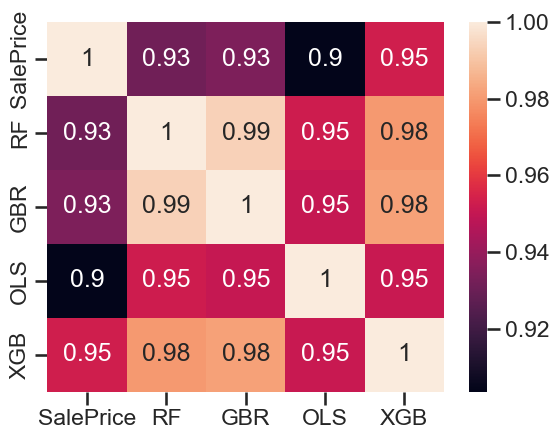

In [23]:
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

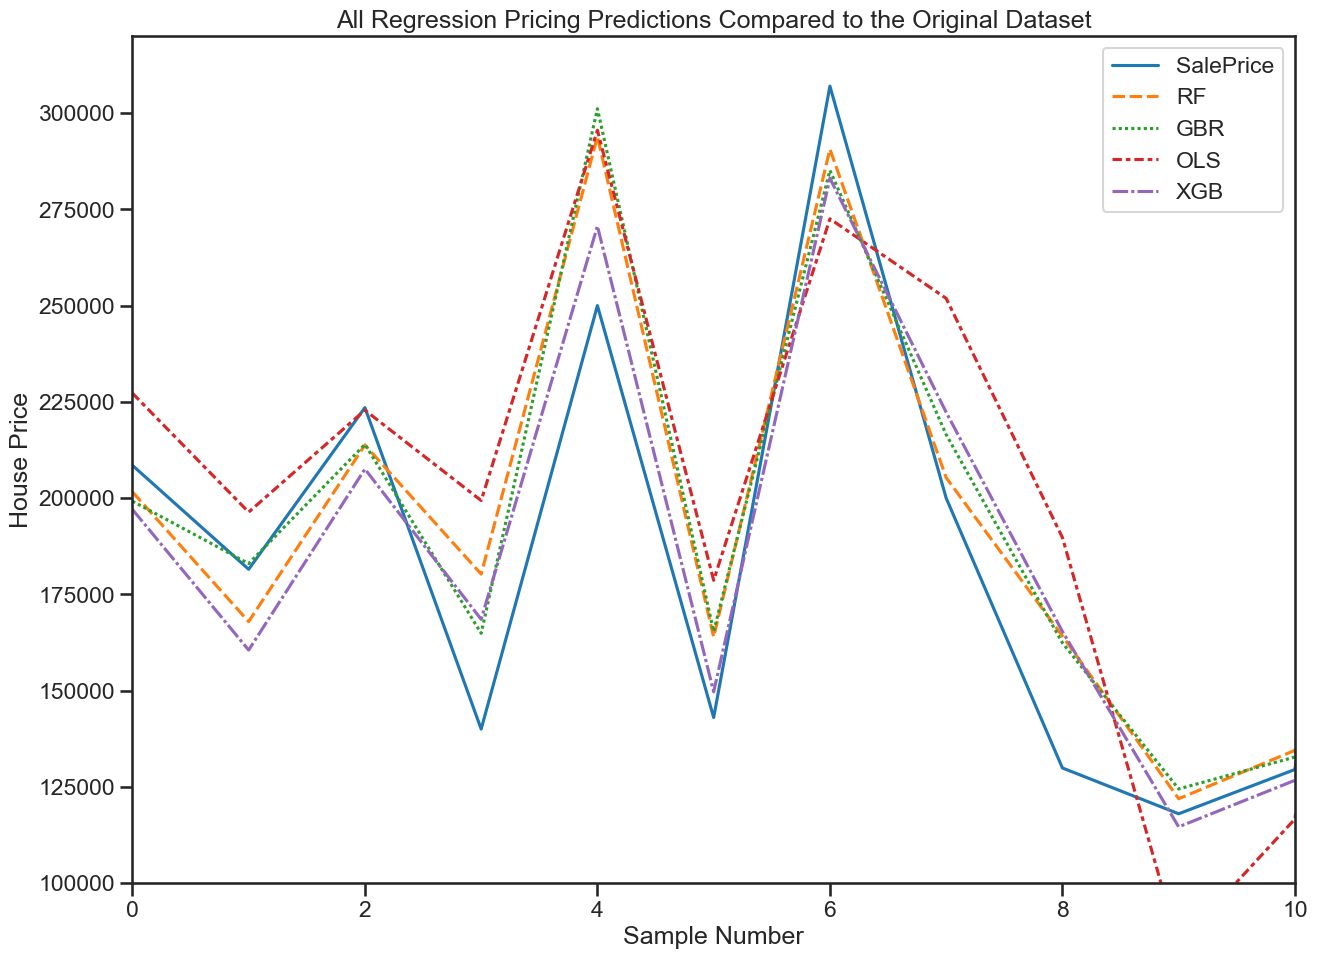

In [24]:
fig, ax = plt.subplots(figsize=(15, 11))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(100000, 320000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

Finally, we decided to plot every regressor, to have a second way to determine the weighting system that we will be using. In this graph we can somewhat see that the spread for XGB is much smaller than for random forest and GBR. There are some large outliers in RF and GBR that are not present in XBR. This is the second indicator that we will weight XGB higher than the rest. Even though OLS has the least spread, the correlation matrix above does not have too good results and will thus get the lowest weighting.

Text(0, 0.5, 'House Price')

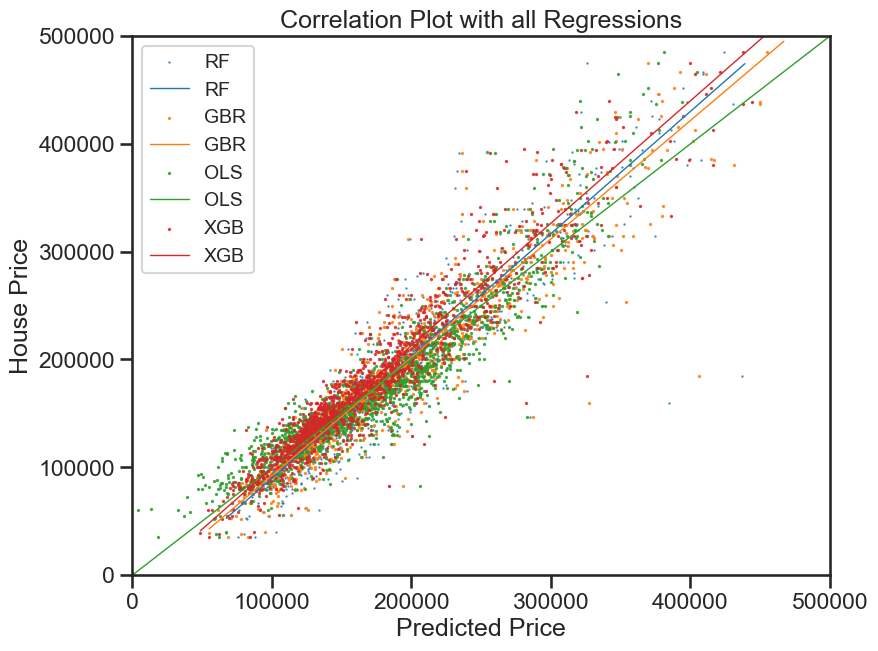

In [25]:
fig, ax = plt.subplots(figsize=(9, 7))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes


sns.regplot(data=prices, x=prices.iloc[:,1:2], y="SalePrice", scatter=True, label="RF", ci=None, scatter_kws={'s':2}, marker=".", line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,2:3], y="SalePrice", scatter=True, scatter_kws={'s':2}, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,3:4], y="SalePrice", scatter=True, label="OLS", scatter_kws={'s':2}, ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,4:5], y="SalePrice", scatter=True, label="XGB", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})

#plt.legend(labels=["RF", "GBR", "OLS", "XGB", "XGB",], prop={'size': 14})
plt.legend(labels=["RF", "RF", "GBR", "GBR", "OLS", "OLS", "XGB", "XGB",], prop={'size': 14})
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

In [26]:
# fig, ax = plt.subplots(figsize=(8, 8))
# #ax = sns.lineplot(prices)
#
# #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#
# #create a legend
# plt.xlim(0, 500000)
# plt.ylim(0, 500000)
# #plt.tight_layout()
# plt.title("Correlation Plot with all Regressions")
# # always label your axes
#
# # sample data, reduce amount of dots
# df_sample=prices.sample(200)
#
# sns.regplot(data=df_sample, x=df_sample.iloc[:,1:2], y="SalePrice", label="RF", ci=None, scatter_kws={'s':5}, marker=".", line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,2:3], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,3:4], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="OLS", ci=None, line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,4:5], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="XGB", ci=None, line_kws={"linewidth":1})
#
# plt.legend(labels=["Random Forest","Random Forest", "Gradient Boosted Regressor", "OLS", "XGB"], prop={'size': 14})
# plt.xlabel(r"Predicted Price")
# plt.ylabel(r"House Price")

# Weightings based on Perceived Accuracy

Finally, we apply the weightings to determine the Average price.

In [27]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["RF"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["GBR"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGB"] = xgb.iloc[:,-1:]

In [28]:
weight = [.93, .94, .9, .95]
columns = ["RF", "GBR", "OLS", "XGB"]
prices["Avg."] = np.average(prices[columns], weights=weight, axis=1)

prices.head(10)

,SalePrice,RF,GBR,OLS,XGB,Avg.
0,208500,201605.405644,199190.286061,227243.598710,197047.84,206034.027684
1,181500,167914.166931,182984.557094,196355.868944,160523.31,176715.883189
2,223500,213785.525125,213946.694751,222831.166926,207541.17,214420.051926
3,140000,180254.549919,164878.316442,199358.318716,168497.36,177988.528958
4,250000,293904.255031,301135.237904,295552.240770,270626.47,290185.549463
5,143000,163914.319744,165343.440291,178645.733189,149685.72,164205.845458
6,307000,290624.806044,285114.009083,272538.422890,283064.47,282925.823994
7,200000,205306.786794,216497.056529,251870.815786,222295.05,223738.327033
8,129900,164165.078550,162395.697628,189753.427301,165361.50,170214.244192
9,118000,121912.664944,124442.264659,83918.353787,114605.55,111493.628518


In [29]:
#prices["Weighted Average"] = (prices["Random Forest"]* 0.15)+ (prices["Gradient Boosted Regressor"]*0.2)+ (prices["OLS"]*0.05)+ (prices["XGB Regressor"]*0.6)

#prices.head(10)

This correlation matrix allows us to test the new weighted average. The score that we get here verifies that it is still highly correlated and is ready for submission.

<AxesSubplot:>

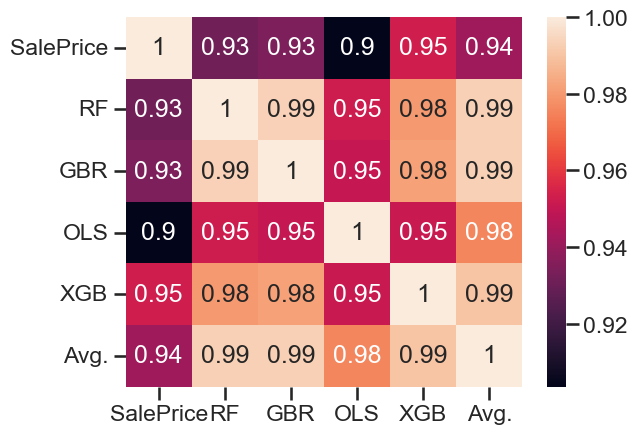

In [30]:
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

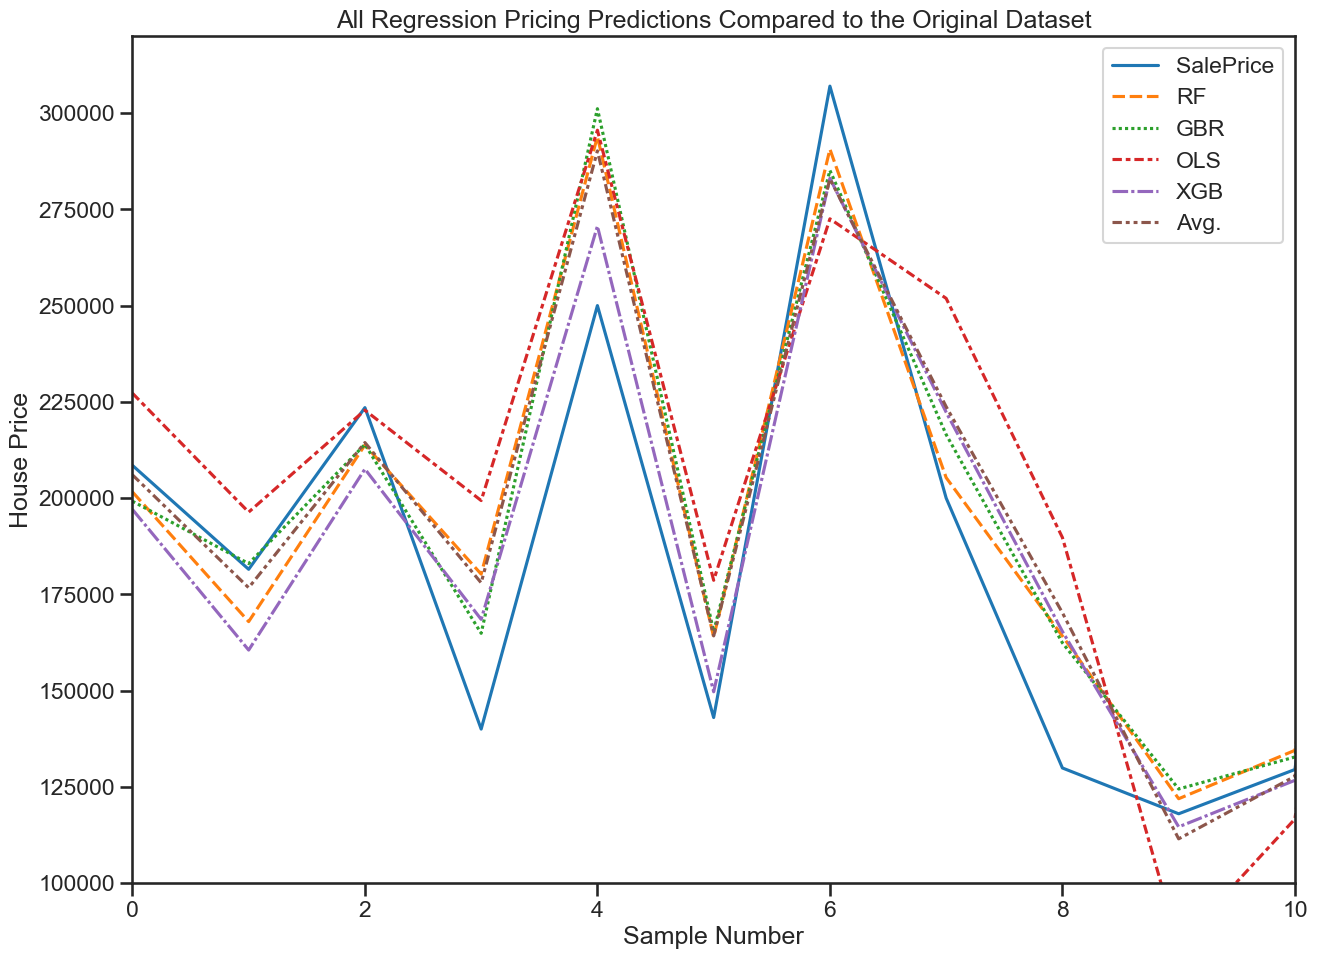

In [31]:
fig, ax = plt.subplots(figsize=(15, 11))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(100000, 320000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

# Correlation with Weighted Average

Text(0, 0.5, 'House Price')

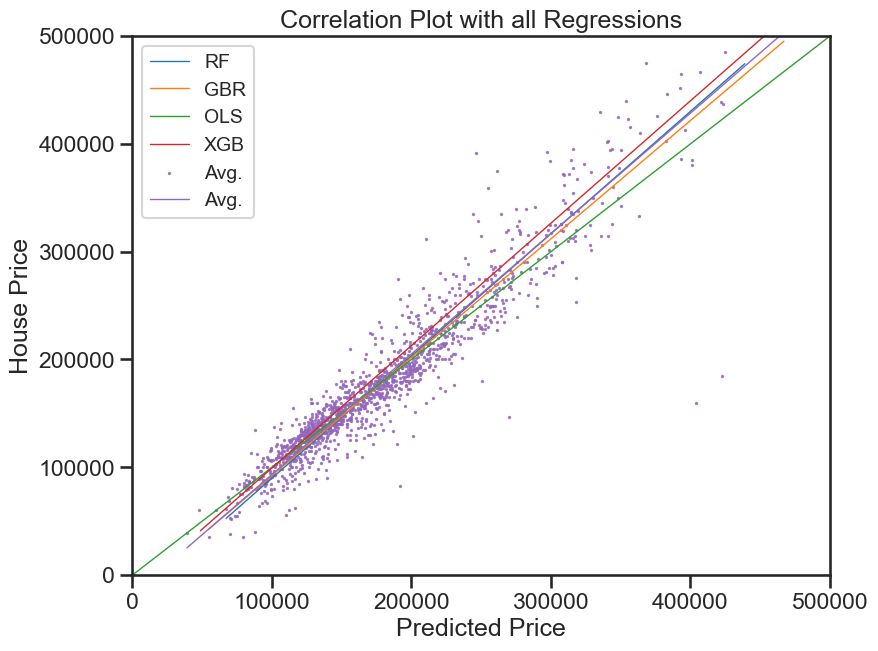

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes


sns.regplot(data=prices, x=prices.loc[:,"RF"], y="SalePrice", scatter=False, label="RF", ci=None, scatter_kws={'s':5}, marker=".", line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"GBR"], y="SalePrice", scatter=False, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"OLS"], y="SalePrice", scatter=False, label="OLS", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"XGB"], y="SalePrice", scatter=False, label="XGB", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"Avg."], y="SalePrice", scatter=True, label="WA", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})

#plt.legend(labels=["RF", "GBR", "OLS", "XGB", "Avg.", "Avg."], prop={'size': 14})
plt.legend(labels=["RF", "GBR", "OLS", "XGB", "Avg.", "Avg."], prop={'size': 14})
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

In [33]:
# #weighted = prices["Weighted Average"]
# weighted = pd.DataFrame(i for i in range(1461,2920))
# weighted = weighted.rename(columns={0:'Id'})
# weighted["SalePrice"] = prices['Avg.']
# weighted = weighted.set_index("Id")
#
# pd.DataFrame(weighted).to_csv(f"{cmn.export_data_path}Weighted Submission.csv")